In [69]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [70]:
import pandas as pd

data_path = '../blue_berry/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col= 'id')

In [71]:
train

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds                 15

In [73]:
train.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


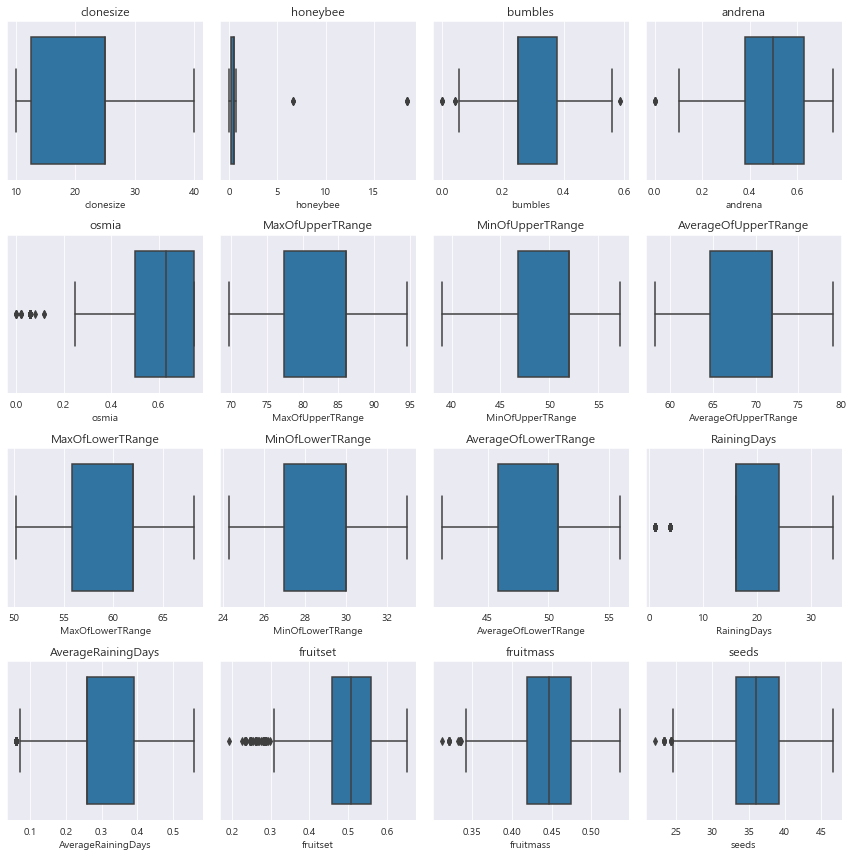

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# 피처 개수 설정
num_features = 16

# 박스플롯 그리드 생성
fig, axes = plt.subplots(nrows=num_features // 4, ncols=4, figsize=(12, 12))

# 각 피처별 박스플롯 그리기
for i, col in enumerate(train.columns[:num_features]):
    ax = axes[i // 4, i % 4]  # 서브플롯 위치 설정
    sns.boxplot(x=train[col], ax=ax)  # 박스플롯 그리기
    ax.set_title(col)  # 서브플롯 제목 설정

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

In [75]:
test

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10194 entries, 15289 to 25482
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             10194 non-null  float64
 1   honeybee              10194 non-null  float64
 2   bumbles               10194 non-null  float64
 3   andrena               10194 non-null  float64
 4   osmia                 10194 non-null  float64
 5   MaxOfUpperTRange      10194 non-null  float64
 6   MinOfUpperTRange      10194 non-null  float64
 7   AverageOfUpperTRange  10194 non-null  float64
 8   MaxOfLowerTRange      10194 non-null  float64
 9   MinOfLowerTRange      10194 non-null  float64
 10  AverageOfLowerTRange  10194 non-null  float64
 11  RainingDays           10194 non-null  float64
 12  AverageRainingDays    10194 non-null  float64
 13  fruitset              10194 non-null  float64
 14  fruitmass             10194 non-null  float64
 15  seeds               

In [77]:
submission

,yield
id,
15289,6025.194
15290,6025.194
15291,6025.194
15292,6025.194
15293,6025.194
...,...
25478,6025.194
25479,6025.194
25480,6025.194


In [78]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258,NaN
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221,NaN
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724,NaN


In [79]:
all_data = all_data.drop('yield' , axis = 1) # 타깃값 제거

all_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724


In [80]:
corrMat = train[train.columns.tolist()[:-1]].corr()
corrMat

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
clonesize,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898
honeybee,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261
bumbles,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022
andrena,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504
osmia,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597
MaxOfUpperTRange,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963
MinOfUpperTRange,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812
AverageOfUpperTRange,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082
MaxOfLowerTRange,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378
MinOfLowerTRange,0.016026,0.005809,-0.001804,-0.013035,-0.031486,0.999829,0.998953,0.999973,0.999489,1.000000,0.999963,0.011466,0.010479,0.007909,0.146704,0.061360


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

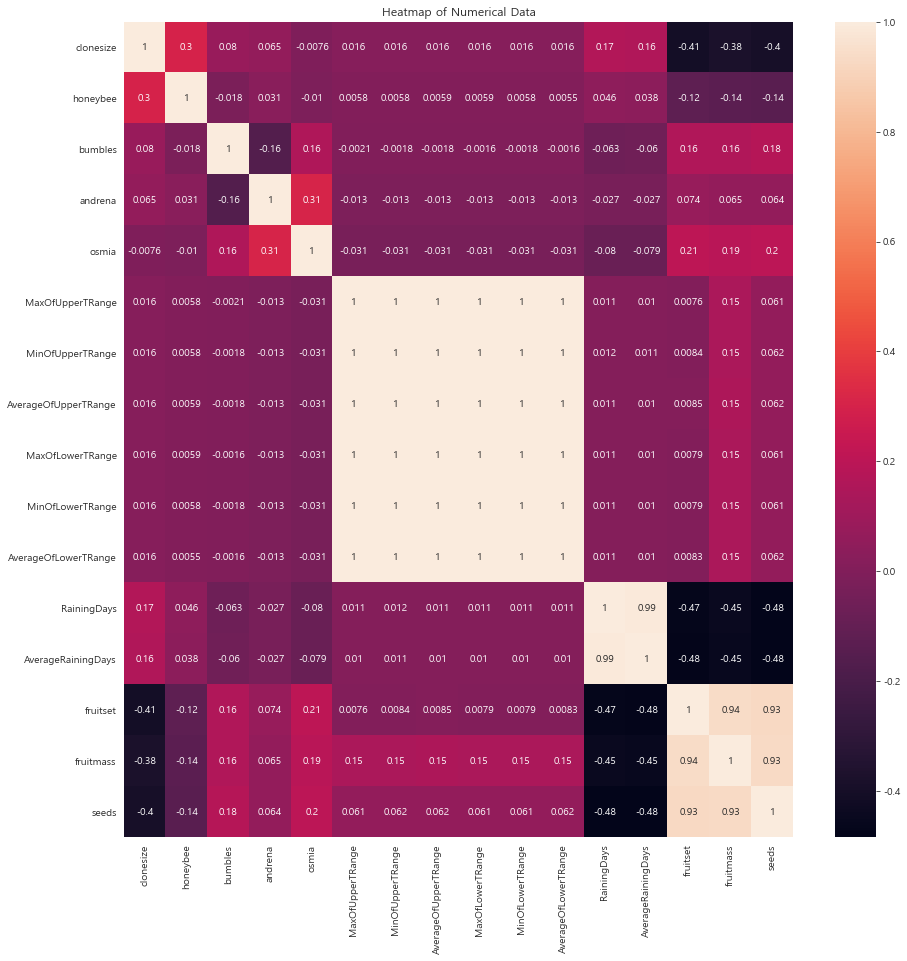

In [81]:
fig,ax = plt.subplots()
fig.set_size_inches(15,15)

sns.heatmap(corrMat , annot =True )
ax.set(title='Heatmap of Numerical Data')

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

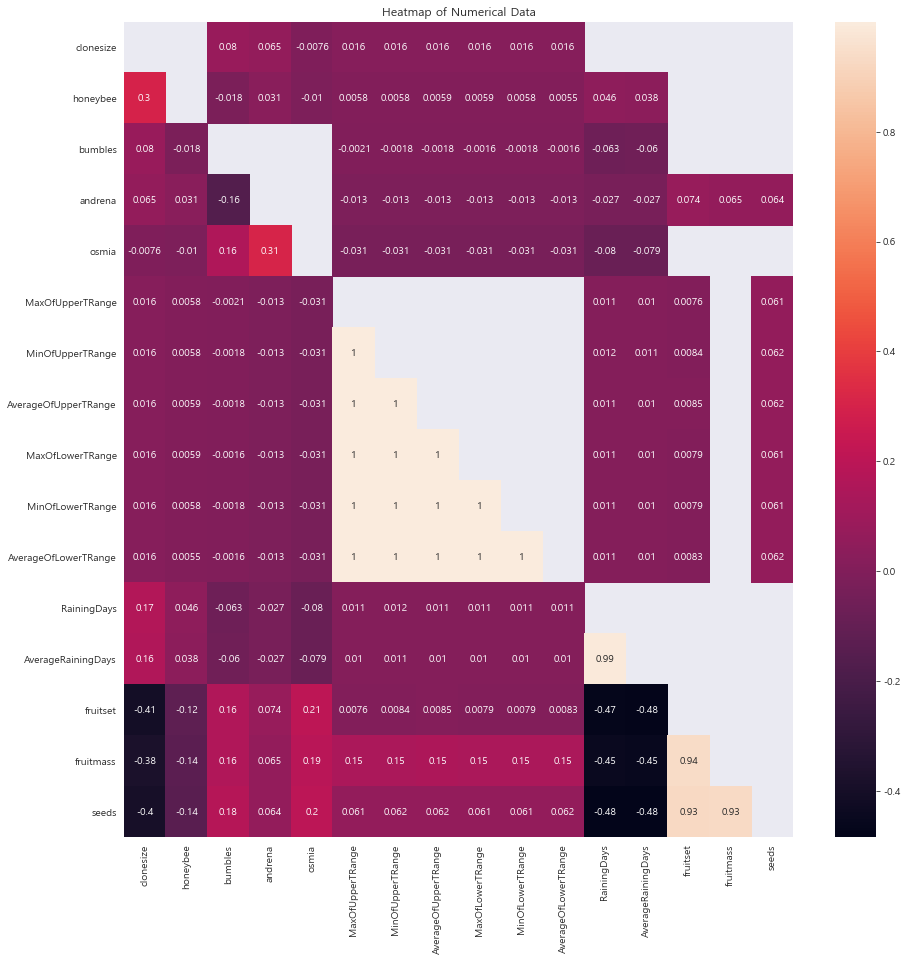

In [82]:
# Mask for correlation values less than 0.1
fig,ax = plt.subplots()
fig.set_size_inches(15,15)
mask = np.zeros_like(corrMat)
mask[np.triu_indices_from(mask)] = True
mask[np.abs(corrMat) < 0.1] = False

sns.heatmap(corrMat, annot=True, mask=mask)
ax.set(title='Heatmap of Numerical Data')

## 베이스라인 모델_랜덤포레스트_회귀

In [83]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [84]:
%%time


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# 선형 회귀 모델 초기화
lr_model = LinearRegression()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lr = {
    'fit_intercept': [True, False],        # 절편 사용 여부
    #'normalize': [True, False]             # 특성 정규화 여부
    'n_jobs' : [-1]
}

# 그리드 서치 객체 생성
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5)

# 그리드 서치 수행
grid_search_lr.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lr = grid_search_lr.best_estimator_
best_params_grid_search_lr = grid_search_lr.best_params_
print("Best Model (Linear Regression):", best_model_grid_search_lr)
print("Best Parameters (Linear Regression):", best_params_grid_search_lr)




Best Model (Linear Regression): LinearRegression(n_jobs=-1)
Best Parameters (Linear Regression): {'fit_intercept': True, 'n_jobs': -1}
Wall time: 99 ms


In [85]:
y_preds = best_model_grid_search_lr.predict(X_test)

y_preds

array([4303.944, 6107.943, 7251.01 , ..., 6935.192, 4449.951, 7325.748])

In [86]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [87]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_lr.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


MAE: 368.90141447649205


In [88]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_linear_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [6, 9, 10, 28, 59]


In [89]:
all_data.columns.tolist()

['clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

In [46]:
all_data['clonesize']

id
0        25.0
1        25.0
2        12.5
3        12.5
4        25.0
         ... 
25478    25.0
25479    25.0
25480    25.0
25481    12.5
25482    12.5
Name: clonesize, Length: 25483, dtype: float64

In [47]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import norm
# import matplotlib.pyplot as plt
#
# # 서브플롯을 생성할 크기 설정
# plt.figure(figsize=(12, 8))
# # sns.countplot(x='clonesize', hue='yield', data=train)
# # 피처들의 리스트
# features = all_data.columns.tolist()
#
# # 피처들에 대한 countplot 그리기
# for i, feature in enumerate(features):
#     plt.subplot(4, 4, i+1)
#     sns.histplot(all_data[feature], kde=True, stat='density', color='skyblue', alpha=0.7)
#     mu, std = norm.fit(all_data[feature].dropna())
#     xmin, xmax = plt.xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = norm.pdf(x, mu, std)
#     plt.plot(x, p, 'r', linewidth=2)
#     plt.title(f'Features distribution (mu={mu:.2f}, std={std:.2f})')
#     plt.title(f'{feature} - Survived Countplot')
#
# # 레이아웃 조정
# plt.tight_layout()
#
# # 그래프 출력
# plt.show()
#
# # [fruitset , fruitmass ,seeds]

In [48]:
# sns.histplot(all_data['fruitset'], kde=True, stat='density', color='skyblue', alpha=0.7)
# mu, std = norm.fit(all_data['fruitset'].dropna())
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'r', linewidth=2)
# plt.title(f'Features distribution (mu={mu:.2f}, std={std:.2f})')

In [49]:
all_data['andrena'].value_counts()

andrena
0.380    7649
0.500    6959
0.630    4986
0.750    3063
0.250    2721
0.409      74
0.000      12
0.229       5
0.147       3
0.490       2
0.560       2
0.101       1
0.234       1
0.240       1
0.235       1
0.707       1
0.260       1
0.585       1
Name: count, dtype: int64

In [50]:
# import datetime
#
# # 현재 날짜와 시각 구하기
# now = datetime.datetime.now()
# date_list = [now.month, now.day, now.hour, now.minute]
# # 현재 날짜와 시각 출력하기
# print("현재 날짜 및 시각 : ", date_list)
#
# # 제출 파일 생성
#
# submission['yield'] = y_preds
# submission.to_csv(f'submission_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

## 베이스라인 모델 선형 모델

### 그리드서치 객체 생성

- 그리드서치는 하이퍼파라미터의 값을바꿔가며'모델'의 성능을 교차검증으로 '평가'해 최적의 하이퍼파라미터 값을 찾아준다.

- 비교 검증해볼 하이퍼파라미터 값 목록

- 대상 모델

- 교차 검증용 평가 수단(평가 함수)
## 회귀 평가지표

- 회귀 모델을 훈련해 최적의 회귀계수를 구할 수 있다.

In [51]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [52]:
%%time

from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

ridge_model = Ridge()

# 하이퍼파라미터 값 목록
ridge_params = {'max_iter': [30, 50,100,200], 'alpha': [0.01,0.05,0.1, 1] ,
                'random_state' : [42],
                'solver' : ['auto']}

# 교차 검증용 평가 함수(MAE 계산)
mae_scorer = metrics.make_scorer(mean_absolute_error, greater_is_better=False)

gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                      param_grid=ridge_params,
                                      scoring=mae_scorer,
                                      cv=5)

# 그리드 서치 수행
gridsearch_ridge_model.fit(X_train, y_train)

best_model_grid_search_ridge = gridsearch_ridge_model.best_estimator_
best_params_grid_search_ridge = gridsearch_ridge_model.best_params_

print("Best Model (Ridge Regression):", best_model_grid_search_ridge)
print("Best Parameters (Ridge Regression):", best_params_grid_search_ridge)


Best Model (Ridge Regression): Ridge(alpha=0.01, max_iter=30, random_state=42)
Best Parameters (Ridge Regression): {'alpha': 0.01, 'max_iter': 30, 'random_state': 42, 'solver': 'auto'}
Wall time: 1.18 s


In [53]:
# 타깃값 1일 확룰 예측

y_preds= best_model_grid_search_ridge.predict(X_test)
# y_preds

In [54]:
# from sklearn.metrics import mean_absolute_error
#
# # 모델 학습 (예시로 Linear Regression 모델 사용)
# # model = LinearRegression()
# # model.fit(X_train, y_train)
#
# # 검증 데이터에 대한 예측 수행
# # y_pred = best_model_grid_search_ridge.predict(X_valid)
#
# # MAE 계산
# mae = mean_absolute_error(y_test, y_preds)
# print("MAE:", mae)

In [55]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [56]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_ridge.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


MAE: 368.9037571230631


In [57]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_Ridge_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

현재 날짜 및 시각 :  [6, 9, 10, 21]


## 부스팅 모델 LightGBM 사용해보기

In [64]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [65]:
import numpy as np

def eval_gini(y_true , y_pred):
    # 실제값과 예측값의 크기가 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0] # 데이터 개수
    L_mid = np.linspace(1/ n_samples ,1 , n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수

    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선

    G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수

    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true) # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

In [68]:
! pip install --upgrade pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
%%time

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# LightGBM 모델 생성
lgb_model = LGBMRegressor()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_lgb = {
    'max_depth': [8,10],                        # 트리의 최대 깊이
    'learning_rate': [0.04],               # 학습률
    'n_estimators': [50, 200],             # 트리의 개수
    'min_child_samples': [1, 2],           # 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.9],                   # 트리를 학습할 때 사용할 샘플링 비율
    'colsample_bytree': [0.8],                # 트리를 학습할 때 사용할 특성의 비율
    'reg_alpha': [0.3 ,0.2],                     # L1 정규화 항의 가중치
    'reg_lambda': [ 0.4 , 0.5],                         # L2 정규화 항의 가중치
    'random_state': [42]                   # 랜덤 시드
}

# 그리드 서치 객체 생성
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, scoring=mae_scorer,cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_lgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_lgb = grid_search_lgb.best_estimator_
best_params_grid_search_lgb = grid_search_lgb.best_params_
print("Best Model (LightGBM):", best_model_grid_search_lgb)
print("Best Parameters (LightGBM):", best_params_grid_search_lgb)






AttributeError: module 'pandas' has no attribute 'Int64Index'

In [61]:
# 타깃값 1일 확룰 예측

y_preds= best_model_grid_search_lgb.predict(X_test)
y_preds

NameError: name 'best_model_grid_search_lgb' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_lgb.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_LGB_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}.csv')

## 부스팅 모델 XGBoost 사용해보기

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor()

# 그리드 서치를 위한 하이퍼파라미터 그리드 준비
param_grid_xgb = {
    # 'max_depth': [3, 5],
    # 'learning_rate': [0.01 , 0.05],
    # 'n_estimators': [300, 400],
    # 'subsample': [1.0 ],  # subsample 비율
    # 'colsample_bytree': [0.8, 0.9 ],  # 각 트리에 사용되는 특성(feature)의 비율
    # 'gamma': [0 , 0.1],  # 트리 노드를 추가로 분할하기 위한 최소 손실 감소값
    # 'reg_alpha': [0.01 ],  # L1 정규화 항의 가중치
    # 'reg_lambda': [0]  # L2 정규화 항의 가중치
    "n_estimators":[30, 50],
    "max_depth":[3, 4,],
    "n_jobs" : [-1],
    "learning_rate":[.3,.2],
    "subsample":[.8 , 1.0],
    # "colsample_bytree":[0.8,1],
    # "gamma":[0,0.1,1,5],
    # "lambda":[.01,.1,1],
    # "ManchesterUTD" : [0, 0.2]

}

# 그리드 서치 객체 생성
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb,scoring = mae_scorer, cv=10, n_jobs=-1)

# 그리드 서치 수행
grid_search_xgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_grid_search_xgb = grid_search_xgb.best_estimator_
best_params_grid_search_xgb = grid_search_xgb.best_params_
print("Best Model (XGBoost):", best_model_grid_search_xgb)
print("Best Parameters (XGBoost):", best_params_grid_search_xgb)


In [ ]:
# 타깃값 1일 확룰 예측

y_preds= best_model_grid_search_xgb.predict(X_test)
y_preds

In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_xgb.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_XGB_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## 베이지안 최적화를 통한 최적의 하이퍼파라미터 찾아보기_XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
#
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y_train = train['yield'].values


# ########################################
# # 데이터 분할
# num_train = len(train) # 훈련 데이터 개수
#
# # 훈련 데이터와 테스트 데이터 나누기
#
# X= all_data_sprs[:num_train] # 0~num_train -1 행
# X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행
#
# y = train['Survived'].values
#
#
# X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
y_test = submission['yield'].values

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from skopt import BayesSearchCV

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor()

# 베이지안 최적화를 위한 하이퍼파라미터 범위 정의
param_grid_xgb = {
    'n_estimators': (30, 50),
    'max_depth': (3, 4),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.8, 1.0),
}

# 베이지안 최적화 객체 생성
bayes_search_xgb = BayesSearchCV(xgb_model, param_grid_xgb, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

# 베이지안 최적화 수행
bayes_search_xgb.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
best_model_bayes_xgb = bayes_search_xgb.best_estimator_
best_params_bayes_xgb = bayes_search_xgb.best_params_
print("Best Model (XGBoost - Bayesian):", best_model_bayes_xgb)
print("Best Parameters (XGBoost - Bayesian):", best_params_bayes_xgb)


In [ ]:
# 타깃값 1일 확룰 예측

y_preds= best_model_grid_search_xgb.predict(X_test)
y_preds

In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = best_model_grid_search_xgb.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


## LightGBM를 활용한 MAE_SCORING활용 및 베이지안 최적화를 수행 이후 충화 K폴드 고차 검증으로 타깃값 예측

In [ ]:
from scipy import sparse
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
all_data_sprs = sparse.csr_matrix(all_data)
X= all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['yield'].values



# 8:2 비율로 훈련 데이터, 검증 데이터 분리(베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = lgb.Dataset(X_train , y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'num_leaves' : (30 , 50) , # 개별 트리가 가질 수 있는 최대 말단 노드 개수 , 트리 복잡도 결정, 값이 클수록 좋다.
                'learning_rate' : (0.9, 1), # 학습률( 부스팅 이터레이션을 반복하면서 모델을 업데이트하는 데 사용 되는 비율)
                'lambda_l1' : (0.1 , 0.2), # L1 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'lambda_l2' : (0.1 , 0.2), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'feature_fraction' : (0.6 , 0.7), # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
                'bagging_fraction' : (0.6 , 0.7), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                'min_child_samples' : (6 , 10) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수 , 값이 클수록 과대적합 방지
                'min_child_weight' : (10 , 40), # 과대적합 방지 위한 값
                'subsample' : (0.8,1),
                }

# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'regression' , # 훈련 목적 , 회귀에서는 'regression' , 이진분류에서는 'binary' , 다중분류에서는 'multiclass' 사용

                'bagging_freq' : 1, # 배깅 수행 빈도, 몇번의 이터레이션마다 배깅 수행할 지 결정
                'force_row_wise' : True, # 메모리 용량이 충분하지 않을 때 메모리 효율을 높이는 파라미터
                'random_state' : 1991} # 랜덤 시드값 (코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [ ]:
def gini(preds , dtrain):
    labels = dtrain.get_label()
    return 'gini' , eval_gini(labels, preds) , True

In [ ]:
def mae_scorer(preds, dtrain):
    labels = dtrain.get_label()
    return 'Mae' , mean_absolute_error(labels, preds), True


In [ ]:
# def eval_function(num_leaves , lambda_l1 , lambda_l2 , feature_fraction , bagging_fraction , min_child_samples , min_child_weight) :
#
#     # 최적화하려는 평가지표(지니계수) 계산 함수
#
#     # 베이지안 최적화를 수행할 하이퍼파라미터
#
#     params = {'num_leaves' : int(round(num_leaves)) , # 개발 트리가 가질 수 있는 최대 말단 노드 개수, 트리 복잡도 결정 , 값이 클수록 좋다.
#               'lambda_l1' : lambda_l1, # L1 규제 조정값 , 값이 클 수록 과대적합 방지 효과
#               'lambda_l2' : lambda_l2 , # L2 규제 조정값 , 값이 클 수록 과대적합 방지 효과
#               'feature_fraction' : feature_fraction ,  # 개별 트리를 훈련할 때 사용할 피처 샘플링 비율
#               'bagging_fraction' : bagging_fraction, # 개별 트리를 훈련할 때 사용할 배깅 데이터 샘플링 비율
#               'min_child_samples' : int(round(min_child_samples)) , # 말단 노드가 되기 위해 필요한 최소 데이터 개수, 값이 클수록 과대적합 방지
#               'min_child_weight' : min_child_weight, # 과대적합 방지 위한 값
#               'feature_pre_filter' : False} #
#
#     #하이퍼파라미터도 추가
#     params.update(fixed_params)
#
#     print('하이퍼파라미터 : ' , params)
#
#     # LightGBM 모델 훈련
#     lgb_model = lgb.train(params = params , # 훈련용 하이퍼파라미터
#                           train_set = bayes_dtrain, # 훈련 데이터셋
#                           num_boost_round= 2500, #부스팅 반복횟수
#                           valid_sets= bayes_dvalid, # 성능 평가용 검증 데이터 셋
#                           feval = gini, # 검증용 평가지표
#                           early_stopping_rounds= 300, # 조기종료 조건
#                           verbose_eval= False) # 계속 점수 출력
#     # 검증 데이터로 예측 수행
#     preds = lgb_model.predict(X_valid)
#
#     # 지니계수 계산
#     gini_score = eval_gini(y_valid, preds)
#     print(f'지니계수 : {gini_score}\n')
#
#     return gini_score

#===========================================================
def eval_function(num_leaves,learning_rate, lambda_l1, lambda_l2, feature_fraction, bagging_fraction, min_child_samples, min_child_weight ,subsample):
    # 평가지표(MAE) 계산을 위한 함수
    params = {
        'num_leaves': int(round(num_leaves)),
        'learning_rate' : learning_rate,
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'feature_fraction': feature_fraction,
        'bagging_fraction': bagging_fraction,
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': min_child_weight,
        'feature_pre_filter': False,
        'subsample' : subsample
    }
    params.update(fixed_params)

    print('하이퍼파라미터:', params)

    # LightGBM 모델 훈련
    lgb_model = lgb.train(
        params=params,
        train_set=bayes_dtrain,
        num_boost_round=2500,
        valid_sets=bayes_dvalid,
        feval=mae_scorer,  # 수정하지 않음: MAE 평가지표 사용
        early_stopping_rounds=300,
        verbose_eval=False
    )

    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid)

    # MAE 계산
    mae = mean_absolute_error(y_valid, preds)
    print(f'MAE: {mae}\n')

    return -mae  # 수정하지 않음: 음수로 반환하여 최적화에 활용








In [ ]:
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f = eval_function, # 평가지표 계산 함수
                                 pbounds = param_bounds, # 하이퍼파라미터 범위
                                 random_state = 0 )

In [ ]:
%%time
# 베이지안 최적화 수행

optimizer.maximize(init_points=  3 , n_iter = 6) # init_points 는 무작위로 하이퍼파라미터를 탐색하는 횟수, n_iter는 베이지안 최적화 반복 횟수


In [ ]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
# 정수형 하이퍼파라미터 변환

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
max_params['subsample'] = float(round(max_params['subsample'] ,2))

In [ ]:
max_params.update(fixed_params)

In [ ]:
max_params

In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold ,KFold

# 층화 K 폴드 교차 검증기 생성
folds = KFold(n_splits=5 , shuffle = True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열

oof_val_preds = np.zeros(X.shape[0])

# OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])

# OOF 방식으로 모델 훈련 ,검증 , 예측

for idx, (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력
    print('#'*40 , f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)

    X_train , y_train = X[train_idx] , y[train_idx] # 훈련용 데이터
    X_valid , y_valid = X[valid_idx] , y[valid_idx] # 검증용 데이터

    # LightGBM 전용 데이터셋 생성
    dtrain = lgb.Dataset(X_train , y_train) # LightGBM 전용 훈련 데이터셋
    dvalid = lgb.Dataset(X_valid , y_valid) # LightGBM 전용 검증 데이터셋

    # LightGBM 모델 훈련
    lgb_model = lgb.train(params = max_params , # 최적 하이퍼파라미터
                          train_set = dtrain, # 훈련 데이터 셋
                          num_boost_round= 2500, # 부스팅 반복 횟수
                          valid_sets= dvalid , # 성능 평가용 검증 데이터셋
                          feval = mae_scorer, # 검증용 평가지표
                          early_stopping_rounds= 300, # 조기종료 조건
                          verbose_eval = 100) # 100 번째 마다 점수 출력

    # 테스트 데이터를 활용해 OOF 예측
    oof_test_preds += lgb_model.predict(X_test) / folds.n_splits

    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측

    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    oof_test_preds_lgb = oof_test_preds
    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    Mae_score = mean_absolute_error(y_valid, oof_val_preds[valid_idx])
    #gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  MAE SCORE : {Mae_score}\n')

In [ ]:
oof_val_preds

In [ ]:
oof_val_preds[valid_idx]

In [ ]:
print('OOF 검증 데이터 지니계수 :' , mean_absolute_error(y, oof_val_preds))

In [ ]:
y_preds = oof_test_preds
y_preds

In [ ]:
from sklearn.model_selection import train_test_split
#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X= all_data[:num_train] # 0~num_train -1 행
X_test = all_data[num_train:] # num_train ~ 마지막 행

y = train['yield'].values


X_train , X_valid , y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state=0)
# y_test = correct['Survived'].values

In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = lgb_model.predict(X_valid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)


In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_KFOLD_LGB_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## XGBoost 활용

In [ ]:
def mae_scorer(preds, dtrain):
    labels = dtrain.get_label()
    return 'Mae' , mean_absolute_error(labels, preds)


In [ ]:
from scipy import sparse
from sklearn.model_selection import train_test_split
import xgboost as xgb

# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
all_data_sprs = sparse.csr_matrix(all_data)
X= all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['yield'].values



# 8:2 비율로 훈련 데이터, 검증 데이터 분리(베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = xgb.DMatrix(X_train , y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth' : (4 , 10) , # 개별 트리의 최대 깊이, 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합 우려
                # 값이 클수록 깊이가 한 단계만 늘어나도 메모리 사용량이 급격히 많아진다.
                # 일반적으로 3~10 사이의 값을 주로 사용한다.

                'subsample' : (0.5 , 1), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                # 0~1 사이 값으로 설정할 수 있다.
                # 0.5 로 설정하면 전체 데이터의 50%를 사용해 트리를 생성

                'colsample_bytree' : (0.7 , 1.0), # 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
                # subsample 과 유사한 개념, subsample은 전체 데이터에서 얼마나 샘플링할지 나타내는 비율
                # colsample_bytree는 전체 피처에서 얼마나 샘플링할지 나타내는 비율
                # 값이 작을수록 과대적합 방지 효과

                'min_child_weight' : (5 , 10), # 과대적합 방지위한 값, 값이 클수록 과대적합 방지 효과가 있다.
                'gamma' : (8 , 11), # 말단 노드가 분할하기 위한 최소 손실 감소 값
                # 소실 감소가 gamma보다 크면 말단 노드를 분할
                # 값이 클수록 과대적합 방지 효과가 있다.

                'reg_alpha' : (7 , 9) , # L1 규제 조정 값 , 값이 클수록 과대적합 방지 효과
                'reg_lambda' : (1.1 , 1.5), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'scale_pos_weight' : (1.4 , 1.6), # 뷸균형 데이터 가중치 조정 값 ,
# 타깃값이 불균형할 때 양성 값에 scale_pos_weight 만큼 가중치를 줘서 균형을 맞춤(타깃값 1을 양성 값으로 간주)
# 일반적으로 scale_pos_weight 값을 (음성 타깃값 개수 / 양성 타깃값 개수) 로 설정
                'learning_rate' : (0.02, 0.1)} # 학습률( 부스팅 스텝을 반복하면서 모델을 업데이트하는 데 사용되는 비율)


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'reg:squarederror' ,# 훈련 목적 , binary : logistic( 확률값을 구하는 이진분류)
                # reg : squarederror (회귀 문제)
                # 소프트맥스 함수를 사용하는 다중분류에서는 multi : softmax 사용
                # 확률값을 구하는 다중분류에서는 'multi : softprob' 사용

                'random_state' : 1991} # 랜덤 시드값(코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)



In [ ]:
# ======================================================
def eval_function(max_depth ,learning_rate, subsample , colsample_bytree , min_child_weight , reg_alpha , gamma , reg_lambda , scale_pos_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'max_depth' : int(round(max_depth)) , # 개별 트리의 최대깊이
              'learning_rate' : learning_rate,
              'subsample' : subsample, # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
              'colsample_bytree' : colsample_bytree , # 개별 트리를 훈련할때 사용하는 피처 샘플링
              'min_child_weight' :  # 과대적합 방지위한 값
                  min_child_weight,
              'gamma' : gamma, # 말단 노드가 분할하기 위한 최소 손실 감소 값
              'reg_alpha' : reg_alpha, # L1 규제 조정값
              'reg_lambda' : reg_lambda, # L2 규제 조정값
              'scale_pos_weight' : scale_pos_weight} # 불균형 데이터 가중치 조정값

    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # XGBoost 모델 훈련 , train() 메서드의 하이퍼파라미터
    xgb_model = xgb.train(params = params , # XGBoost 모델의 하이퍼파라미터 목록 , 딕셔너리 타입으로 전달
                          dtrain = bayes_dtrain, # 훈련 데이터셋, xgboost.DMatrix 타입으로 전달
                          num_boost_round= 2000, # 부스팅 반복 횟수, 정수형 타입으로 전달
                          # num_boost_round 값이 클수록 성능이 좋아질 수 있으나 과대적합의 우려가 있다.
                          # num_boost_round 값이 작으면 반복 횟수가 줄어들어 훈련 시간이 짧아진다.
                          # 일반적으로 num_boost_round를 늘리면 learning_rate를 줄여야 한다.

                          evals = [(bayes_dvalid , ' bayes_dvalid')],
                          # 모델 성능 평가용 검증 데이터셋
                          # (DMatrix, 문자열) 쌍들을 원소로 갖는 리스트 타입으로 전달, 검증 데이터셋 이름을 원하는 대로 문자열로 정하면 된다.
                          maximize = True, # feval 평가지수가 높으면 좋은지 여부
                          feval = mae_scorer, # 검증용 평가지표, 사용자 정의 함수 형태
                          # evals를 활용해 모델 성능을 검증할 때 사용할 사용자 정의 평가지표 함수
                          # 예측값과 실제값을 파라미터로 전달받아, 평가지표명과 평가점수를 반환하는 함수이다.
                          early_stopping_rounds= 200,
                          # 조기종료 조건
                          # 모델은 기본적으로 num_boost_round만큼 훈련을 반복하며, 매 이터레이션마다 evals로 모델 성능을 평가하여 성능이 연속으로
                          # 좋아지지 않는다면 훈련을 중단하는데, 훈련 중단에 필요한 최소횟수가 early_stopping_rounds 이다. 즉 , early_stopping_rounds
                          # 동안 모델 성능이 좋아지지 않는다면 훈련을 중단한다.

                          # 과대적합 방지 효과

                          # 조기종료를 적용하기 위해서는 evals 에 검증 데이터가 하나 이상 있어야한다. 또한 evals에 검증 데이터가 여러 개라면 마지막 검증
                          # 데이터를 기준으로 조기종료 조건을 적용한다.


                          verbose_eval= False) # 성능 점수 로그 설정 값
    # True 로 설정하면 매 부스팅 스텝마다 평가점수르 출력
    # 출력값이 너무 많아지는 것을 방지하기위해 verbose_eval로 설정

    best_iter = xgb_model.best_iteration # 최적 반복횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid , iteration_range=(0, best_iter))

    # 지니계수 계산
    mae_score = mean_absolute_error(y_valid, preds)
    print(f'Mae_score : {mae_score}\n')

    return -mae_score

In [ ]:
%%time

from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성

optimizer = BayesianOptimization(f= eval_function, pbounds = param_bounds , random_state= 0)


# 베이지안 최적화 수행


optimizer.maximize(init_points= 3 , n_iter= 6)

In [ ]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params.update(fixed_params)
max_params

In [ ]:
%%time

# %%time
# from sklearn.model_selection import StratifiedKFold ,KFold
#
# # 층화 K 폴드 교차 검증기 생성
# folds = KFold(n_splits=5 , shuffle = True , random_state= 1991)
#
# # OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
#
# oof_val_preds = np.zeros(X.shape[0])
#
# # OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
# oof_test_preds = np.zeros(X_test.shape[0])
#
# # OOF 방식으로 모델 훈련 ,검증 , 예측
#
# for idx, (train_idx , valid_idx) in enumerate(folds.split(X,y)):
#     # 각 폴드를 구분하는 문구 출력
#     print('#'*40 , f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)
#
#     X_train , y_train = X[train_idx] , y[train_idx] # 훈련용 데이터
#     X_valid , y_valid = X[valid_idx] , y[valid_idx] # 검증용 데이터
#
#     # LightGBM 전용 데이터셋 생성
#     dtrain = lgb.Dataset(X_train , y_train) # LightGBM 전용 훈련 데이터셋
#     dvalid = lgb.Dataset(X_valid , y_valid) # LightGBM 전용 검증 데이터셋
#
#     # LightGBM 모델 훈련
#     lgb_model = lgb.train(params = max_params , # 최적 하이퍼파라미터
#                           train_set = dtrain, # 훈련 데이터 셋
#                           num_boost_round= 2500, # 부스팅 반복 횟수
#                           valid_sets= dvalid , # 성능 평가용 검증 데이터셋
#                           feval = mae_scorer, # 검증용 평가지표
#                           early_stopping_rounds= 300, # 조기종료 조건
#                           verbose_eval = 100) # 100 번째 마다 점수 출력
#
#     # 테스트 데이터를 활용해 OOF 예측
#     oof_test_preds += lgb_model.predict(X_test) / folds.n_splits
#
#     # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
#
#     oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
#     oof_test_preds_lgb = oof_test_preds
#     # 검증 데이터 예측 확률에 대한 정규화 지니계수
#     Mae_score = mean_absolute_error(y_valid, oof_val_preds[valid_idx])
#     #gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
#     print(f'폴드 {idx+1}  MAE SCORE : {Mae_score}\n')

# ============================================================
from sklearn.model_selection import StratifiedKFold, KFold

# 층화 K 폴드 교차 검증기 생성
folds = KFold(n_splits= 5 , shuffle= True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# # OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])
# OOF 방식으로 훈련된 모델 훈련 , 검증 , 예측

for idx , (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력

    print('#' *40,  f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)


    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx]
    X_valid , y_valid = X[valid_idx] , y[valid_idx]

    #XGBoost 전용 데이터셋 생성

    dtrain = xgb.DMatrix(X_train , y_train)
    dvalid = xgb.DMatrix(X_valid , y_valid)
    dtest = xgb.DMatrix(X_test)

    #XGBoost 모델 훈련
    xgb_model = xgb.train(params = max_params,
                          dtrain = dtrain,
                          num_boost_round = 2000,
                          evals = [(dvalid , 'valid')],
                          maximize = True,
                          feval = mae_scorer,
                          early_stopping_rounds = 200,
                          verbose_eval = 100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter= xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += xgb_model.predict(dtest, iteration_range = (0 , best_iter))/ folds.n_splits

    oof_test_preds_xgb = oof_test_preds
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid , iteration_range=(0, best_iter))


    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    mae_score = mean_absolute_error(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  MAE : {mae_score}\n')

In [ ]:
oof_val_preds

In [ ]:
oof_val_preds[valid_idx]

In [ ]:
print('OOF 검증 데이터 mae :', mean_absolute_error(y, oof_val_preds))

In [ ]:
y_preds = oof_test_preds
y_preds

In [ ]:
from sklearn.model_selection import train_test_split

#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train)  # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X = all_data[:num_train]  # 0~num_train -1 행
X_test = all_data[num_train:]  # num_train ~ 마지막 행

y = train['yield'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
# y_test = correct['Survived'].values


In [ ]:
X

In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
dvalid = xgb.DMatrix(X_valid)

y_pred = xgb_model.predict(dvalid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)

In [ ]:
y_preds

In [ ]:
X_test

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_KFOLD_XGB_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## PCA 처리 이후 모델 돌려보기

In [ ]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data = all_data.drop('yield' , axis = 1) # 타깃값 제거

all_data

# [fruitset , fruitmass ,seeds]

In [ ]:
all_data_pca = all_data.iloc[:,:-3]
all_data_pca

In [ ]:
from sklearn.decomposition import PCA

# 변수 간의 상관관계 행렬 계산
corr_matrix = all_data_pca.corr()
threshold = 0.9 # 상관관계의 임계값 설정
high_corr_vars = corr_matrix[abs(corr_matrix) >= threshold].stack().index
high_corr_vars = [var[0] for var in high_corr_vars if var[0] != var[1]]
# 상관관계 행렬을 기반으로 PCA 수행
pca = PCA(n_components=1)
pca.fit(corr_matrix)

# 주성분 변환 적용
transformed_data = pca.transform(all_data_pca)

# 변환된 데이터로 업데이트
all_data['PCA_Component'] = transformed_data

# 상관관계가 높은 변수들을 제외한 업데이트된 데이터
selected_vars = [col for col in all_data_pca.columns if col not in high_corr_vars]
updated_data = all_data_pca[selected_vars]
updated_data



In [ ]:
all_data_updated = pd.concat([updated_data, all_data[['fruitset' , 'fruitmass' ,'seeds' , 'PCA_Component']]], axis=1)
all_data_updated

In [ ]:
# import pandas as pd
#
# # 마지막 3개의 열을 제외한 열 선택
# selected_columns = all_data.columns[:-3]
# all_data_2 = pd.DataFrame()
# # 각 열에 대해 qcut을 사용하여 5개의 범주로 나누기 (중복된 경계값 제거)
# for column in selected_columns:
#     all_data_2[column + '_Category'] = pd.qcut(all_data[column], q=5, labels=False, duplicates='drop')
#
# all_data_2

In [ ]:
# import pandas as pd
#
# # 'all_data'의 마지막 3개 열 선택
# last_3_columns = all_data.iloc[:, -3:]
#
# # 'all_data_2'와 'last_3_columns' 합치기
# all_data_2 = pd.concat([all_data_2, last_3_columns], axis=1)
#
# all_data_2

In [ ]:
def mae_scorer(preds, dtrain):
    labels = dtrain.get_label()
    return 'Mae' , mean_absolute_error(labels, preds)


In [ ]:
from scipy import sparse
from sklearn.model_selection import train_test_split
import xgboost as xgb

# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
all_data_sprs = sparse.csr_matrix(all_data_updated)
X= all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['yield'].values



# 8:2 비율로 훈련 데이터, 검증 데이터 분리(베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = xgb.DMatrix(X_train , y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth' : (4 , 10) , # 개별 트리의 최대 깊이, 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합 우려
                # 값이 클수록 깊이가 한 단계만 늘어나도 메모리 사용량이 급격히 많아진다.
                # 일반적으로 3~10 사이의 값을 주로 사용한다.

                'subsample' : (0.5 , 1), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                # 0~1 사이 값으로 설정할 수 있다.
                # 0.5 로 설정하면 전체 데이터의 50%를 사용해 트리를 생성

                'colsample_bytree' : (0.5 , 1.0), # 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
                # subsample 과 유사한 개념, subsample은 전체 데이터에서 얼마나 샘플링할지 나타내는 비율
                # colsample_bytree는 전체 피처에서 얼마나 샘플링할지 나타내는 비율
                # 값이 작을수록 과대적합 방지 효과

                'min_child_weight' : (5 , 10), # 과대적합 방지위한 값, 값이 클수록 과대적합 방지 효과가 있다.
                'gamma' : (8 , 11), # 말단 노드가 분할하기 위한 최소 손실 감소 값
                # 소실 감소가 gamma보다 크면 말단 노드를 분할
                # 값이 클수록 과대적합 방지 효과가 있다.

                'reg_alpha' : (7 , 9) , # L1 규제 조정 값 , 값이 클수록 과대적합 방지 효과
                'reg_lambda' : (1.1 , 1.5), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'scale_pos_weight' : (1.4 , 1.6), # 뷸균형 데이터 가중치 조정 값 ,
                # 타깃값이 불균형할 때 양성 값에 scale_pos_weight 만큼 가중치를 줘서 균형을 맞춤(타깃값 1을 양성 값으로 간주)
                # 일반적으로 scale_pos_weight 값을 (음성 타깃값 개수 / 양성 타깃값 개수) 로 설정
                'learning_rate' : (0.02, 0.1)} # 학습률( 부스팅 스텝을 반복하면서 모델을 업데이트하는 데 사용되는 비율)


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'reg:squarederror' ,# 훈련 목적 , binary : logistic( 확률값을 구하는 이진분류)
                # reg : squarederror (회귀 문제)
                # 소프트맥스 함수를 사용하는 다중분류에서는 multi : softmax 사용
                # 확률값을 구하는 다중분류에서는 'multi : softprob' 사용

                'random_state' : 1991} # 랜덤 시드값(코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)



In [ ]:
# ======================================================
def eval_function(max_depth ,learning_rate, subsample , colsample_bytree , min_child_weight , reg_alpha , gamma , reg_lambda , scale_pos_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'max_depth' : int(round(max_depth)) , # 개별 트리의 최대깊이
              'learning_rate' : learning_rate,
              'subsample' : subsample, # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
              'colsample_bytree' : colsample_bytree , # 개별 트리를 훈련할때 사용하는 피처 샘플링
              'min_child_weight' :  # 과대적합 방지위한 값
                  min_child_weight,
              'gamma' : gamma, # 말단 노드가 분할하기 위한 최소 손실 감소 값
              'reg_alpha' : reg_alpha, # L1 규제 조정값
              'reg_lambda' : reg_lambda, # L2 규제 조정값
              'scale_pos_weight' : scale_pos_weight} # 불균형 데이터 가중치 조정값

    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # XGBoost 모델 훈련 , train() 메서드의 하이퍼파라미터
    xgb_model = xgb.train(params = params , # XGBoost 모델의 하이퍼파라미터 목록 , 딕셔너리 타입으로 전달
                          dtrain = bayes_dtrain, # 훈련 데이터셋, xgboost.DMatrix 타입으로 전달
                          num_boost_round= 2000, # 부스팅 반복 횟수, 정수형 타입으로 전달
                          # num_boost_round 값이 클수록 성능이 좋아질 수 있으나 과대적합의 우려가 있다.
                          # num_boost_round 값이 작으면 반복 횟수가 줄어들어 훈련 시간이 짧아진다.
                          # 일반적으로 num_boost_round를 늘리면 learning_rate를 줄여야 한다.

                          evals = [(bayes_dvalid , ' bayes_dvalid')],
                          # 모델 성능 평가용 검증 데이터셋
                          # (DMatrix, 문자열) 쌍들을 원소로 갖는 리스트 타입으로 전달, 검증 데이터셋 이름을 원하는 대로 문자열로 정하면 된다.
                          maximize = True, # feval 평가지수가 높으면 좋은지 여부
                          feval = mae_scorer, # 검증용 평가지표, 사용자 정의 함수 형태
                          # evals를 활용해 모델 성능을 검증할 때 사용할 사용자 정의 평가지표 함수
                          # 예측값과 실제값을 파라미터로 전달받아, 평가지표명과 평가점수를 반환하는 함수이다.
                          early_stopping_rounds= 200,
                          # 조기종료 조건
                          # 모델은 기본적으로 num_boost_round만큼 훈련을 반복하며, 매 이터레이션마다 evals로 모델 성능을 평가하여 성능이 연속으로
                          # 좋아지지 않는다면 훈련을 중단하는데, 훈련 중단에 필요한 최소횟수가 early_stopping_rounds 이다. 즉 , early_stopping_rounds
                          # 동안 모델 성능이 좋아지지 않는다면 훈련을 중단한다.

                          # 과대적합 방지 효과

                          # 조기종료를 적용하기 위해서는 evals 에 검증 데이터가 하나 이상 있어야한다. 또한 evals에 검증 데이터가 여러 개라면 마지막 검증
                          # 데이터를 기준으로 조기종료 조건을 적용한다.


                          verbose_eval= False) # 성능 점수 로그 설정 값
    # True 로 설정하면 매 부스팅 스텝마다 평가점수르 출력
    # 출력값이 너무 많아지는 것을 방지하기위해 verbose_eval로 설정

    best_iter = xgb_model.best_iteration # 최적 반복횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid , iteration_range=(0, best_iter))

    # 지니계수 계산
    mae_score = mean_absolute_error(y_valid, preds)
    print(f'Mae_score : {mae_score}\n')

    return -mae_score

In [ ]:
%%time

from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성

optimizer = BayesianOptimization(f= eval_function, pbounds = param_bounds , random_state= 0)


# 베이지안 최적화 수행


optimizer.maximize(init_points= 3 , n_iter= 6)

In [ ]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params.update(fixed_params)
max_params

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

# 층화 K 폴드 교차 검증기 생성
folds = KFold(n_splits= 5 , shuffle= True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# # OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])
# OOF 방식으로 훈련된 모델 훈련 , 검증 , 예측

for idx , (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력

    print('#' *40,  f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)


    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx]
    X_valid , y_valid = X[valid_idx] , y[valid_idx]

    #XGBoost 전용 데이터셋 생성

    dtrain = xgb.DMatrix(X_train , y_train)
    dvalid = xgb.DMatrix(X_valid , y_valid)
    dtest = xgb.DMatrix(X_test)

    #XGBoost 모델 훈련
    xgb_model = xgb.train(params = max_params,
                          dtrain = dtrain,
                          num_boost_round = 2000,
                          evals = [(dvalid , 'valid')],
                          maximize = True,
                          feval = mae_scorer,
                          early_stopping_rounds = 200,
                          verbose_eval = 100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter= xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += xgb_model.predict(dtest, iteration_range = (0 , best_iter))/ folds.n_splits

    oof_test_preds_xgb = oof_test_preds
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid , iteration_range=(0, best_iter))


    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    mae_score = mean_absolute_error(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  MAE : {mae_score}\n')

In [ ]:
print('OOF 검증 데이터 mae :', mean_absolute_error(y, oof_val_preds))

In [ ]:
y_preds = oof_test_preds
y_preds

In [ ]:
from sklearn.model_selection import train_test_split

#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train)  # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X = all_data_updated[:num_train]  # 0~num_train -1 행
X_test = all_data_updated[num_train:]  # num_train ~ 마지막 행

y = train['yield'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
# y_test = correct['Survived'].values


In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
dvalid = xgb.DMatrix(X_valid)

y_pred = xgb_model.predict(dvalid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_KFOLD_XGB_PCA_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

## MCA 처리 이후 모델 돌려보기

In [ ]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
# all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data = all_data.drop('yield' , axis = 1) # 타깃값 제거

all_data

# [fruitset , fruitmass ,seeds]

In [ ]:
all_data_Mca = all_data.iloc[:,:-3]
all_data_Mca

In [ ]:
# ! pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org  prince

In [ ]:
from prince import MCA

# 변수 간의 상관관계 행렬 계산
corr_matrix = all_data_Mca.corr()
threshold = 0.9 # 상관관계의 임계값 설정
high_corr_vars = corr_matrix[abs(corr_matrix) >= threshold].stack().index
high_corr_vars = [var[0] for var in high_corr_vars if var[0] != var[1]]
# 상관관계 행렬을 기반으로 MCA 수행
mca = MCA(n_components=1)
mca.fit(all_data_Mca)

# 주성분 변환 적용
transformed_data = mca.transform(all_data_Mca)

# 변환된 데이터로 업데이트
all_data['MCA_Component'] = transformed_data

# 상관관계가 높은 변수들을 제외한 업데이트된 데이터
selected_vars = [col for col in all_data_Mca.columns if col not in high_corr_vars]
updated_data = all_data_Mca[selected_vars]
updated_data


In [ ]:
all_data_updated = pd.concat([updated_data, all_data[['fruitset' , 'fruitmass' ,'seeds' , 'MCA_Component']]], axis=1)
all_data_updated

In [ ]:
from scipy import sparse
from sklearn.model_selection import train_test_split
import xgboost as xgb

# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
all_data_sprs = sparse.csr_matrix(all_data_updated)
X= all_data_sprs[:num_train] # 0~num_train -1 행
X_test = all_data_sprs[num_train:] # num_train ~ 마지막 행

y = train['yield'].values



# 8:2 비율로 훈련 데이터, 검증 데이터 분리(베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = xgb.DMatrix(X_train , y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth' : (4 , 10) , # 개별 트리의 최대 깊이, 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합 우려
                # 값이 클수록 깊이가 한 단계만 늘어나도 메모리 사용량이 급격히 많아진다.
                # 일반적으로 3~10 사이의 값을 주로 사용한다.

                'subsample' : (0.5 , 1), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                # 0~1 사이 값으로 설정할 수 있다.
                # 0.5 로 설정하면 전체 데이터의 50%를 사용해 트리를 생성

                'colsample_bytree' : (0.5 , 1.0), # 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
                # subsample 과 유사한 개념, subsample은 전체 데이터에서 얼마나 샘플링할지 나타내는 비율
                # colsample_bytree는 전체 피처에서 얼마나 샘플링할지 나타내는 비율
                # 값이 작을수록 과대적합 방지 효과

                'min_child_weight' : (5 , 10), # 과대적합 방지위한 값, 값이 클수록 과대적합 방지 효과가 있다.
                'gamma' : (8 , 11), # 말단 노드가 분할하기 위한 최소 손실 감소 값
                # 소실 감소가 gamma보다 크면 말단 노드를 분할
                # 값이 클수록 과대적합 방지 효과가 있다.

                'reg_alpha' : (7 , 9) , # L1 규제 조정 값 , 값이 클수록 과대적합 방지 효과
                'reg_lambda' : (1.1 , 1.5), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'scale_pos_weight' : (1.4 , 1.6), # 뷸균형 데이터 가중치 조정 값 ,
                # 타깃값이 불균형할 때 양성 값에 scale_pos_weight 만큼 가중치를 줘서 균형을 맞춤(타깃값 1을 양성 값으로 간주)
                # 일반적으로 scale_pos_weight 값을 (음성 타깃값 개수 / 양성 타깃값 개수) 로 설정
                'learning_rate' : (0.02, 0.1)} # 학습률( 부스팅 스텝을 반복하면서 모델을 업데이트하는 데 사용되는 비율)


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'reg:squarederror' ,# 훈련 목적 , binary : logistic( 확률값을 구하는 이진분류)
                # reg : squarederror (회귀 문제)
                # 소프트맥스 함수를 사용하는 다중분류에서는 multi : softmax 사용
                # 확률값을 구하는 다중분류에서는 'multi : softprob' 사용

                'random_state' : 1991} # 랜덤 시드값(코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)



In [ ]:
%%time

from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성

optimizer = BayesianOptimization(f= eval_function, pbounds = param_bounds , random_state= 0)


# 베이지안 최적화 수행


optimizer.maximize(init_points= 3 , n_iter= 6)

In [ ]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params

In [ ]:
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params.update(fixed_params)
max_params

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

# 층화 K 폴드 교차 검증기 생성
folds = KFold(n_splits= 5 , shuffle= True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# # OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])
# OOF 방식으로 훈련된 모델 훈련 , 검증 , 예측

for idx , (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력

    print('#' *40,  f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)


    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx]
    X_valid , y_valid = X[valid_idx] , y[valid_idx]

    #XGBoost 전용 데이터셋 생성

    dtrain = xgb.DMatrix(X_train , y_train)
    dvalid = xgb.DMatrix(X_valid , y_valid)
    dtest = xgb.DMatrix(X_test)

    #XGBoost 모델 훈련
    xgb_model = xgb.train(params = max_params,
                          dtrain = dtrain,
                          num_boost_round = 2000,
                          evals = [(dvalid , 'valid')],
                          maximize = True,
                          feval = mae_scorer,
                          early_stopping_rounds = 200,
                          verbose_eval = 100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter= xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += xgb_model.predict(dtest, iteration_range = (0 , best_iter))/ folds.n_splits

    oof_test_preds_xgb = oof_test_preds
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid , iteration_range=(0, best_iter))


    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    mae_score = mean_absolute_error(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  MAE : {mae_score}\n')

In [ ]:
print('OOF 검증 데이터 mae :', mean_absolute_error(y, oof_val_preds))

In [ ]:
y_preds = oof_test_preds
y_preds

In [ ]:
from sklearn.model_selection import train_test_split

#
# num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

# X_train= all_data_2[:num_train] # 0~num_train -1 행
# X_test = all_data_2[num_train:] # num_train ~ 마지막 행
#
# y_train = train['Survived'].values


# ########################################
# # 데이터 분할
num_train = len(train)  # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X = all_data_updated[:num_train]  # 0~num_train -1 행
X_test = all_data_updated[num_train:]  # num_train ~ 마지막 행

y = train['yield'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
# y_test = correct['Survived'].values


In [ ]:
from sklearn.metrics import mean_absolute_error

# 모델 학습 (예시로 Linear Regression 모델 사용)
# model = LinearRegression()
# model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
dvalid = xgb.DMatrix(X_valid)

y_pred = xgb_model.predict(dvalid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)

In [ ]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute , now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_KFOLD_XGB_MCA_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')